In [1]:
import sys, os
sys.path.append("../main")
import ZI
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('dark_background')

# Simulazioni con il modello ZI

La funzione principale della libreria ZI è sim_LOB.

I parametri della funzione sono:

- l_rate (float):
    - Rate di arrivo dei limit orders per unità di tempo e per prezzo.
    
- m_rate (float):
    - Rate di arrivo dei market orders.
    
- c_rate (float):
    - Rate probabilità di cancellazione di un ordine.
    
- k (int) default = 100
    - Grandezza LOB. Per motivi di velocità computazionale bisogna tagliare il LOB ad una certa distanza dal mid price. In generale bisogna scegliere un valore di k almeno 10 volte più grande dello spread medio.
    
- iterations (int) default = 10_000:
    - Numero di iterazioni della simulazione.
    
- all_lob (True, False) default = False:
    - Se True la funzione ritorna una lista con tutte lo stato del LOB ad ogni iterazione della simulazione.

La funzione ritorna 3 variabili:

- lob (np.array)
    - Ritorna lo stato del LOB all'ultima iterazione.
    
- spr (np.array):
    - Un array che contiene lo spread ad ogni passo della simulazione.
    
- price (np.array):
    - Un array indica la differenza tra il prezzo corrente e il prezzo iniziale ad ogni passo della simulazione.

- all (list of np.array)
    - Se all_lob è True ritorna una lista con tutte lo stato del LOB ad ogni iterazione della simulazione, se False ritorna una lista vuota.
    
   

# Esempio

Dopo aver ricavato i valori di $\lambda$, $\mu$, $\delta$ da dati TSLA, faccio partire la simulazione con il modello ZI.

Visto che lo spread medio di TSLA è di $\sim$ 20 tick uso come valore di k 200.


In [2]:
#parametri ricavati da TSLA
rate_lim = 0.023
rate_m   = 0.062
rate_del = 0.109

#faccio partire una simulazione con 50_000 iterazioni utilizzando
# i parametri ricavati da TSLA
lob, sp, mp, _ = ZI.sim_LOB(rate_lim, rate_m, rate_del, k = 200, 
                                    iterations = 50_000, all_lob = False)

Dopo aver fatto le simulazioni vedo lo stato del LOB

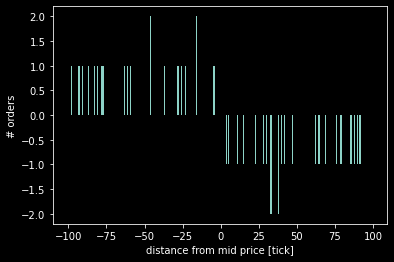

In [3]:
plt.bar(np.arange(-100,100), lob)
plt.xlabel("distance from mid price [tick]")
plt.ylabel("# orders")
plt.show()

Successivamente grafico la distribuzione dello spread

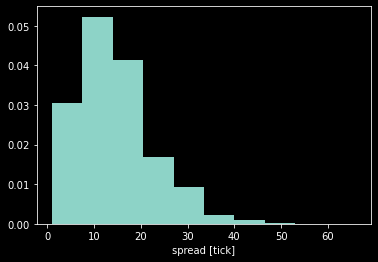

In [4]:
plt.hist(sp, density = True)
plt.xlabel("spread [tick]")
plt.show()

Grafico $m_t - m_0$, dove $m_t$ indica il mid price al tempo t.

Text(0.5, 0, 'iteration')

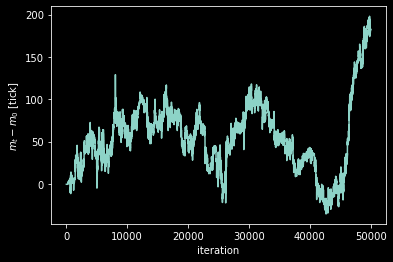

In [5]:
plt.plot(mp)
plt.ylabel(r"$m_t - m_0$ [tick] ")
plt.xlabel("iteration")